The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Rex Morphology Analysis

Analyze Rex's morphology data to answer:
1. How often is a berm present on Rex's beach and what is the morphology like?
2. Does dune height and volume differ when a berm is present or absent?
3. What is the relationship between berm morphology and foreshore slope?

## Load and Prep the Data

In [90]:
# Load the csv file into a DataFrame
morpho_filename = os.path.join(DATA_DIR, 'All Morphometrics Manual.csv')
morpho_df = pd.read_csv(morpho_filename)

# Drop rows where there wasn't any profile
morpho_df = morpho_df.dropna(subset=['duneVolume']).reset_index(drop=True)

# Change the date values to datetime objects
morpho_df['Date'] = pd.to_datetime(morpho_df['Date'])

# Add a flag for if each profile has a berm (1) or not (0)
morpho_df['Bermed'] = morpho_df.apply(lambda x: 0 if np.isnan(x.wetBeachSlope) else 1, axis=1)

# Calculate additional morphometrics
morpho_df['duneHeight'] = morpho_df['crestY'] - morpho_df['toeY']
morpho_df['beachHeight'] = morpho_df['toeY'] - morpho_df['mhwY']
morpho_df['wetBeachHeight'] = morpho_df['bermY'] - morpho_df['mhwY']
morpho_df['dryBeachHeight'] = morpho_df['toeY'] - morpho_df['bermY']
morpho_df['beachWidth'] = morpho_df['toeX'] - morpho_df['mhwX']
morpho_df['wetBeachWidth'] = morpho_df['bermX'] - morpho_df['mhwX']
morpho_df['dryBeachWidth'] = morpho_df['toeX'] - morpho_df['bermX']

# Remove un-necessary columns
morpho_df = morpho_df.drop(columns=['mhwX', 'mhwY', 'bermX', 'bermY', 'toeX', 'toeY', 'crestX', 'crestY'])

morpho_df.head()

,Profile,Date,duneVolume,wetBeachVolume,dryBeachVolume,duneSlope,foreshoreSlope,wetBeachSlope,dryBeachSlope,Bermed,duneHeight,beachHeight,wetBeachHeight,dryBeachHeight,beachWidth,wetBeachWidth,dryBeachWidth
0,7,2024-12-17,65.449279,27.237392,1.228841,0.298607,0.069071,0.084181,0.026128,1,5.822845,2.521101,2.272881,0.248220,36.5,27.00,9.50
1,8,2024-12-17,51.900423,33.395288,0.592193,0.338653,0.070051,0.078083,0.029893,1,5.757097,2.521851,2.342494,0.179358,36.0,30.00,6.00
2,9,2024-12-17,53.758605,35.900816,0.186894,0.322744,0.070516,0.077541,0.018855,1,5.809389,2.503304,2.423172,0.080132,35.5,31.25,4.25
3,10,2024-12-17,47.192915,36.501831,0.644766,0.365257,0.073662,0.076646,0.058504,1,5.570171,2.799174,2.433523,0.365652,38.0,31.75,6.25
4,11,2024-12-17,35.105207,35.343342,0.483510,0.414007,0.071961,0.076725,0.044676,1,5.796098,2.662549,2.416831,0.245718,37.0,31.50,5.50


# How Often is a Berm Present on Rex's Beach and What is Their Morphology Like?

Analyze the amount of bermed profiles and their temporal variability. Then look at the morphology of the berms.

In [44]:
n_profiles = morpho_df.shape[0]
n_bermed_profiles = morpho_df.loc[morpho_df['Bermed'] == 1].shape[0]
n_non_bermed_profiles = morpho_df.loc[morpho_df['Bermed'] == 0].shape[0]

print(f'There are {n_profiles} total profiles, {n_bermed_profiles} have a berm and {n_non_bermed_profiles} do not have a berm')

There are 420 total profiles, 161 have a berm and 259 do not have a berm


In [51]:
morpho_df[['Date', 'Bermed']].groupby('Date').agg(['size', 'sum'])

Bermed    
             size sum
Date                 
2023-03-26     70  33
2023-10-06     70   0
2024-10-23     70  70
2024-12-17     70  58
2025-10-04     70   0
2025-10-15     70   0

Each survey date contains 70 total profiles, the amount that had a berm present varied with each survey. The variability is not surprising, but half of the surveys reflected a beach state without any berms present at all. The berms were completely wiped out between March 26 and October 6, 2023. A year later, on October 23, 2024, the entire beach had a berm present. Most of these berms persisted through to the December 17, 2024 survey before being eroded away by the next year.

**Additional Analysis needed:**
- What caused the berms to form and erode?
- When the berms eroded, did the sediment go to the dune or the nearshore?

Next, let's look at what the beach morphology looked like when a berm was present. Start with the single values.

Figure Saved: Figures/Dry Beach Width Density Plot.png


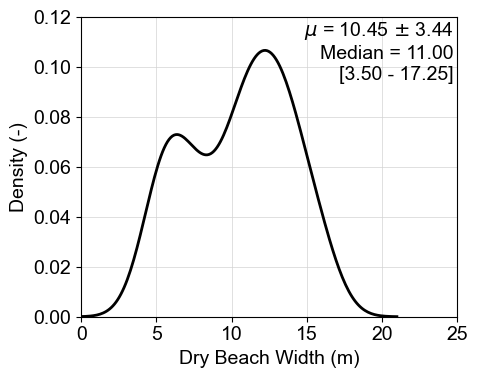

In [105]:
metric = 'dryBeachWidth'
xlabel = 'Dry Beach Width (m)'

fig, ax = plt.subplots(figsize=(5, 4))
sns.kdeplot(morpho_df[metric], color='black', linewidth=2, ax=ax)
ax.text(x=0.99, y=0.99,
        s=f'$\mu$ = {morpho_df[metric].mean():.2f} $\pm$ {morpho_df[metric].std():.2f}\nMedian = {morpho_df[metric].median():.2f}\n[{morpho_df[metric].min():.2f} - {morpho_df[metric].max():.2f}]',
        transform=ax.transAxes, ha='right', va='top', zorder=4)
ax.set_xlim(left=max(min(ax.get_xticks()), 0), right=max(ax.get_xticks()))
ax.set_xlabel(xlabel)
ax.set_ylim(bottom=0, top=max(ax.get_yticks()))
ax.set_ylabel('Density (-)')
fig_funcs.save_figure(FIG_DIR, f'{xlabel.split(" (")[0]} Density Plot', fig=fig)

In [86]:
xlabel.split(' (')[0]

'Wet Beach Volume'